In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DURATION = 70
PATH_PREFIX = "../data/"
FILE_PATH_READELF = PATH_PREFIX + "plot_data_readelf.csv"
FILE_PATH_OBJDUMP = PATH_PREFIX + "plot_data_objdump.csv"
FILE_PATH_CXXFILT = PATH_PREFIX + "plot_data_cxxfilt.csv"
FILE_PATH_NM = PATH_PREFIX + "plot_data_nm.csv"
FILE_PATH_SIZE = PATH_PREFIX + "plot_data_size.csv"
FILE_PATH_STRIP = PATH_PREFIX + "plot_data_strip.csv"
FILE_PATH_W3M = PATH_PREFIX + "plot_data_w3m.csv"
FILE_PATH_XPDF = PATH_PREFIX + "plot_data_xpdf.csv"

In [3]:
df_readelf = pd.read_csv(FILE_PATH_READELF)
df_objdump = pd.read_csv(FILE_PATH_OBJDUMP)
df_cxxfilt = pd.read_csv(FILE_PATH_CXXFILT)
df_nm = pd.read_csv(FILE_PATH_NM)
df_size = pd.read_csv(FILE_PATH_SIZE)
df_strip = pd.read_csv(FILE_PATH_STRIP)
df_w3m = pd.read_csv(FILE_PATH_W3M)
df_xpdf = pd.read_csv(FILE_PATH_XPDF)
lst_df = [
    ['readelf', df_readelf, 'r', '-' ], 
    ['objdump', df_objdump, 'y', '-' ],
    ['cxxfilt', df_cxxfilt, 'g', '-' ],
    ['nm'     , df_nm     , 'b', '-' ],
    ['size'   , df_size   , 'c', '-' ],
    ['strip'  , df_strip  , 'k', '-' ],
    ['w3m'    , df_w3m    , 'k', '--'],
    ['xpdf'   , df_xpdf   , 'c', '--'],
]

In [4]:
# 传入记录AFL生成数据的DataFrame，获取横坐标（time:0~60min）和纵坐标（total paths）
def getData(df):
    x = (df.iloc[:, 0] - df.iloc[0, 0]) / 60
    x = x[x <= DURATION]
    length = x.shape[0]
    y = list(df.iloc[:, 3])[0: length]
    return x, y

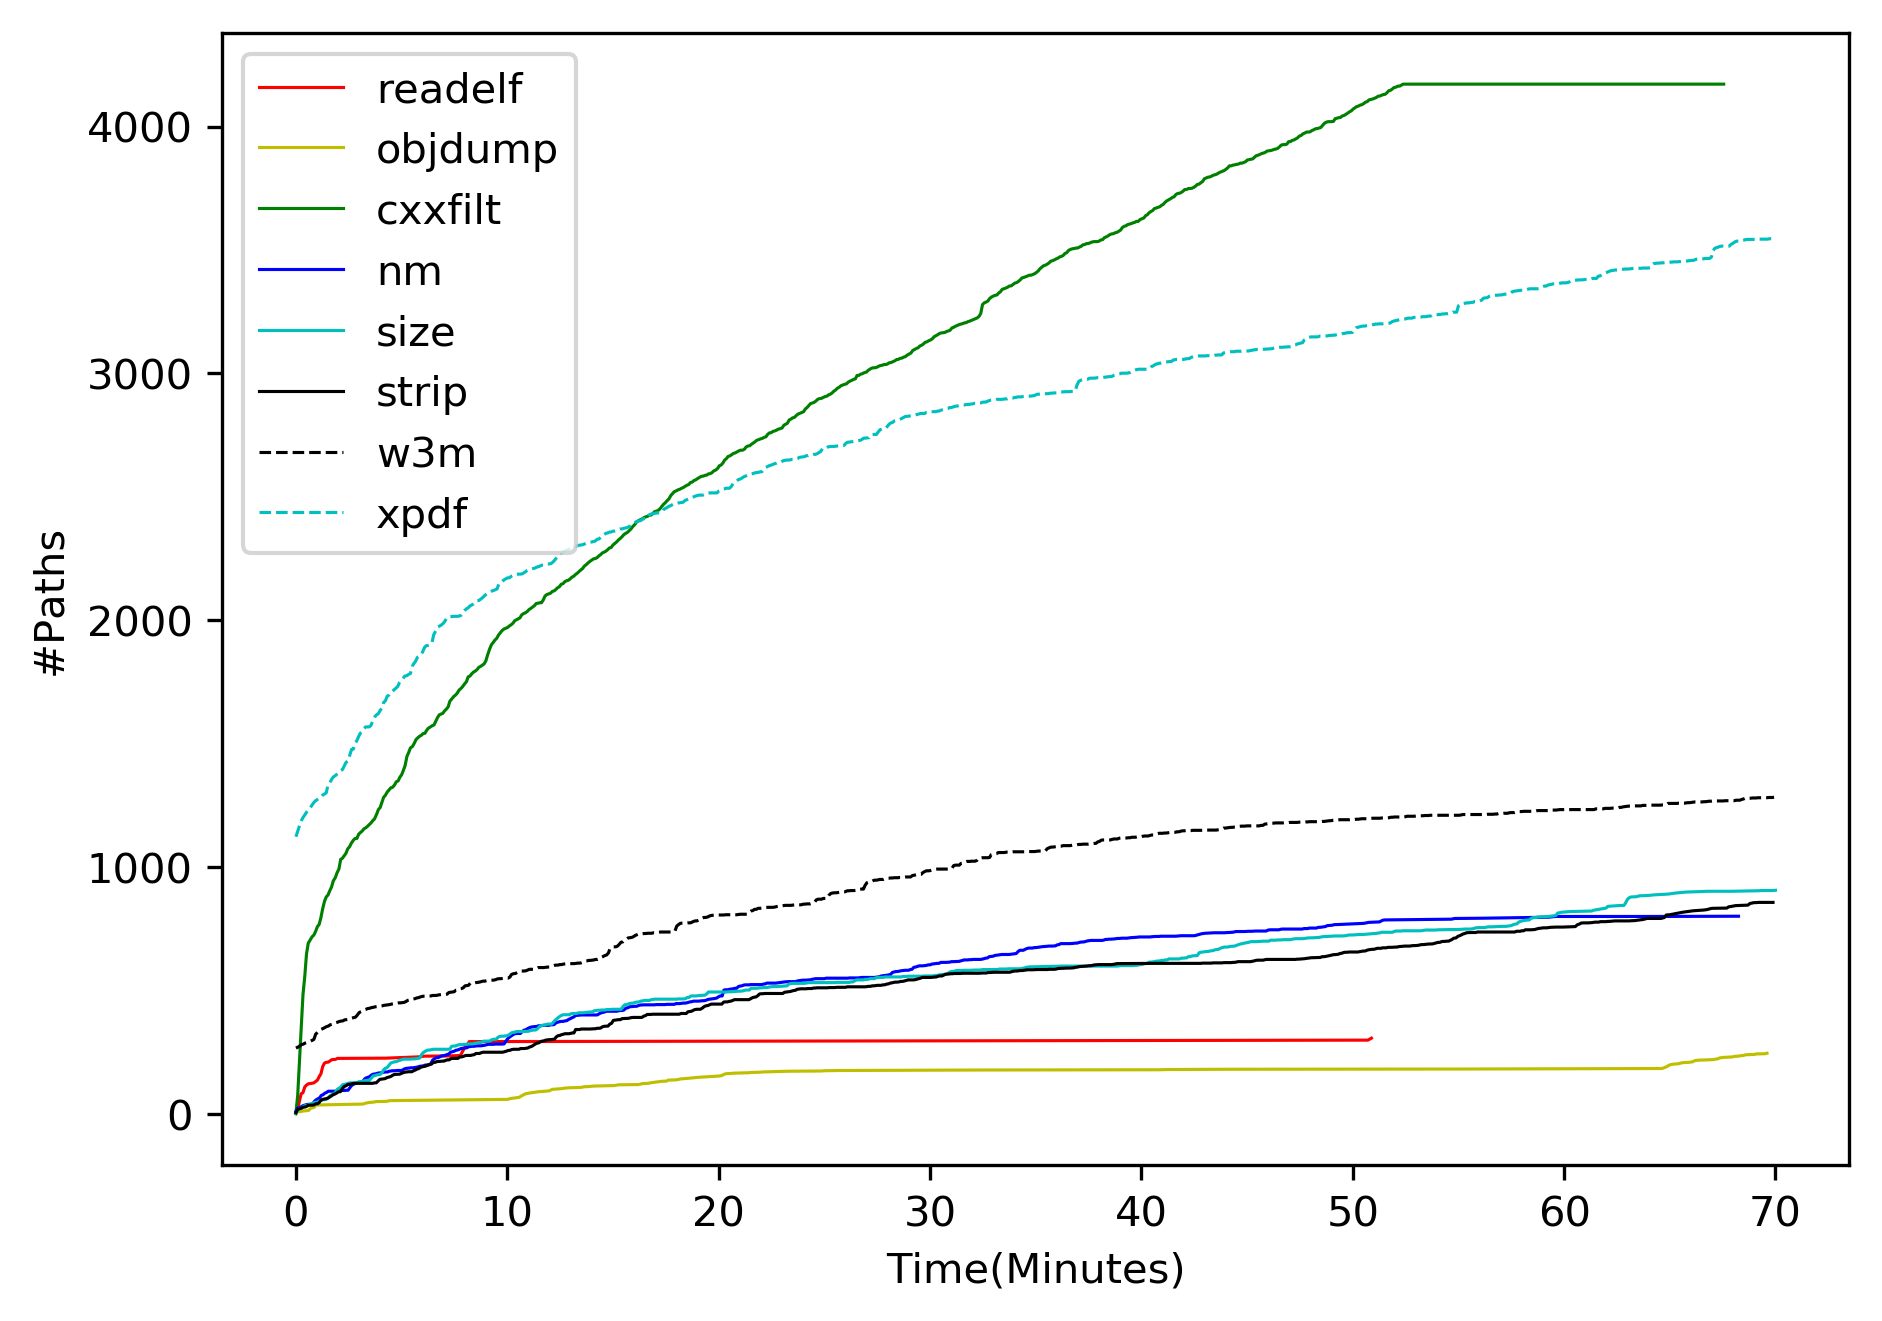

In [5]:
fig = plt.figure(figsize=(7, 5), dpi=300)
plt.xlabel('Time(Minutes)')
plt.ylabel('#Paths')
for each in lst_df:
    x, y = getData(each[1])
    plt.plot(x, y, lw=0.75, ls=each[3], c=each[2], label=each[0])
plt.legend(loc=0)
plt.show()
fig.savefig("../result/result")